In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.duplicated().any()

False

In [5]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

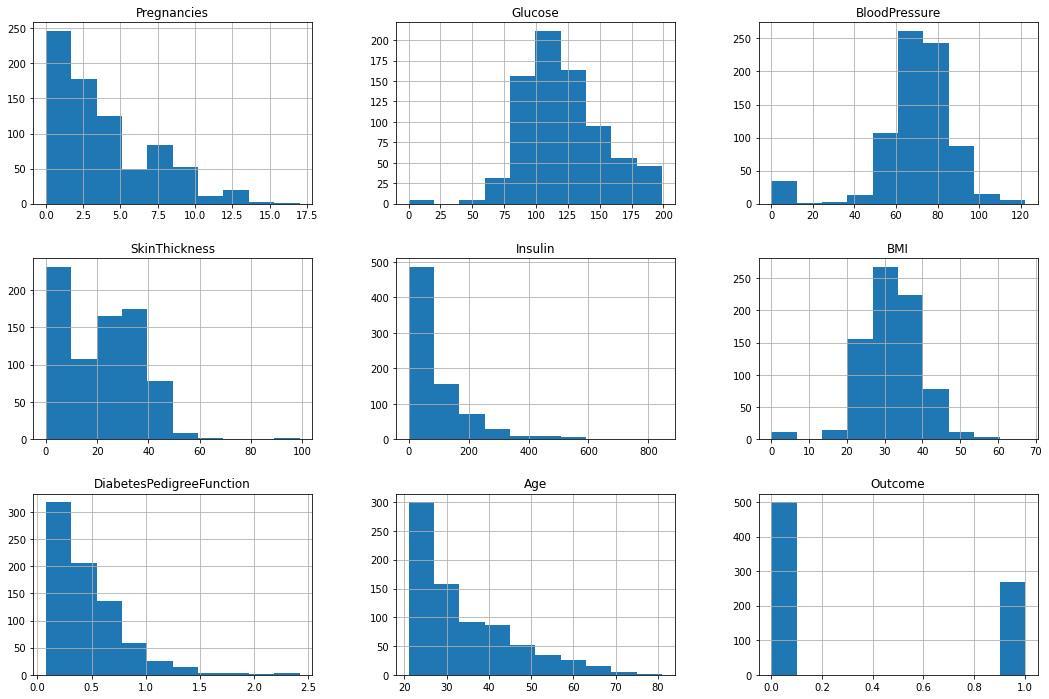

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

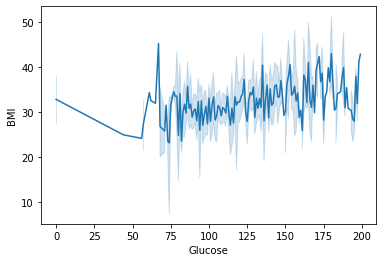

In [8]:
sns.lineplot(x='Glucose', y= 'BMI', data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

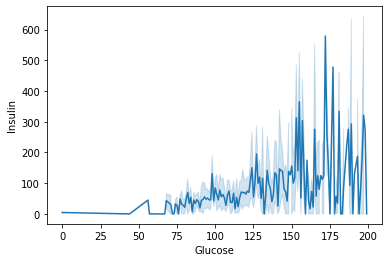

In [9]:
sns.lineplot(x='Glucose', y= 'Insulin', data=df)

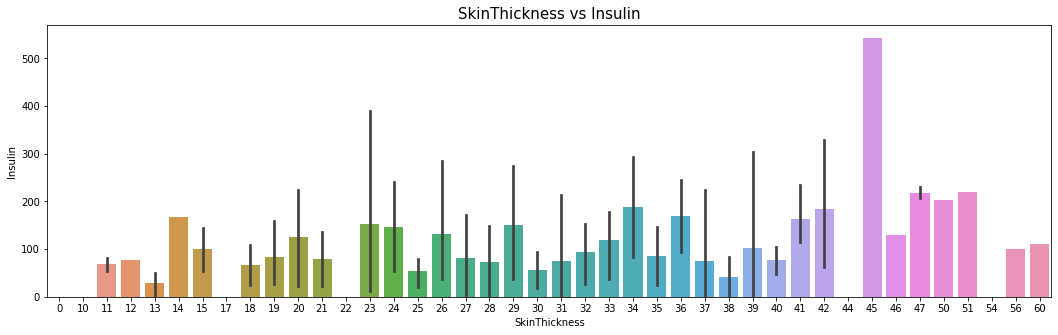

In [10]:

f, ax = plt.subplots(figsize=(18,5))
sns.barplot(x="SkinThickness", y="Insulin", data=df[0:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

In [11]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [12]:
df = df.set_index("Glucose")
df = df.drop([0,])

In [13]:
df = df.reset_index()

In [14]:
k=list(df.query('Outcome == 1')['Glucose'])

In [15]:
d={}
for i in k:
    if i not in d:
        d[i]=1
    else:
        d[i]+=1

In [16]:
d

{148: 3,
 183: 2,
 137: 2,
 78: 1,
 197: 3,
 125: 7,
 168: 4,
 189: 3,
 166: 2,
 100: 4,
 118: 2,
 107: 3,
 115: 6,
 196: 3,
 119: 4,
 143: 2,
 147: 3,
 158: 6,
 102: 4,
 90: 2,
 111: 3,
 171: 3,
 180: 4,
 103: 1,
 176: 2,
 187: 4,
 133: 2,
 114: 2,
 109: 5,
 126: 2,
 131: 3,
 136: 4,
 134: 4,
 122: 3,
 163: 3,
 95: 3,
 155: 4,
 160: 1,
 146: 5,
 124: 5,
 162: 5,
 113: 2,
 88: 1,
 117: 2,
 105: 3,
 173: 5,
 170: 2,
 108: 3,
 156: 3,
 188: 2,
 152: 3,
 104: 3,
 179: 3,
 129: 6,
 130: 3,
 194: 2,
 181: 5,
 128: 6,
 139: 2,
 159: 1,
 135: 2,
 184: 3,
 140: 3,
 112: 4,
 151: 3,
 85: 1,
 177: 1,
 142: 2,
 164: 2,
 92: 1,
 141: 2,
 123: 2,
 138: 3,
 101: 1,
 106: 1,
 161: 2,
 167: 3,
 144: 4,
 182: 1,
 178: 1,
 165: 1,
 116: 1,
 193: 1,
 172: 1,
 175: 1,
 120: 3,
 145: 4,
 195: 2,
 84: 1,
 132: 2,
 186: 1,
 198: 1,
 121: 2,
 150: 1,
 174: 2,
 97: 2,
 80: 1,
 199: 1,
 169: 1,
 93: 1,
 149: 1,
 154: 1,
 190: 1}

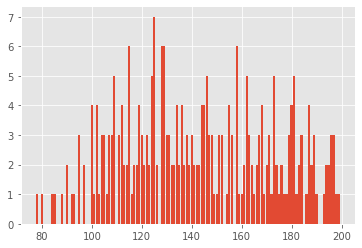

In [17]:
plt.bar(d.keys(),
            d.values(),width=0.9)
# Show the plot
plt.show()

<AxesSubplot:>

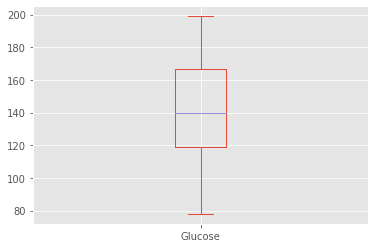

In [18]:
k=df.query('Outcome==1')['Glucose']
k
k.plot(kind='box')

In [19]:
k

0      148
2      183
4      137
6       78
8      197
      ... 
750    128
752    123
754    190
756    170
761    126
Name: Glucose, Length: 266, dtype: int64

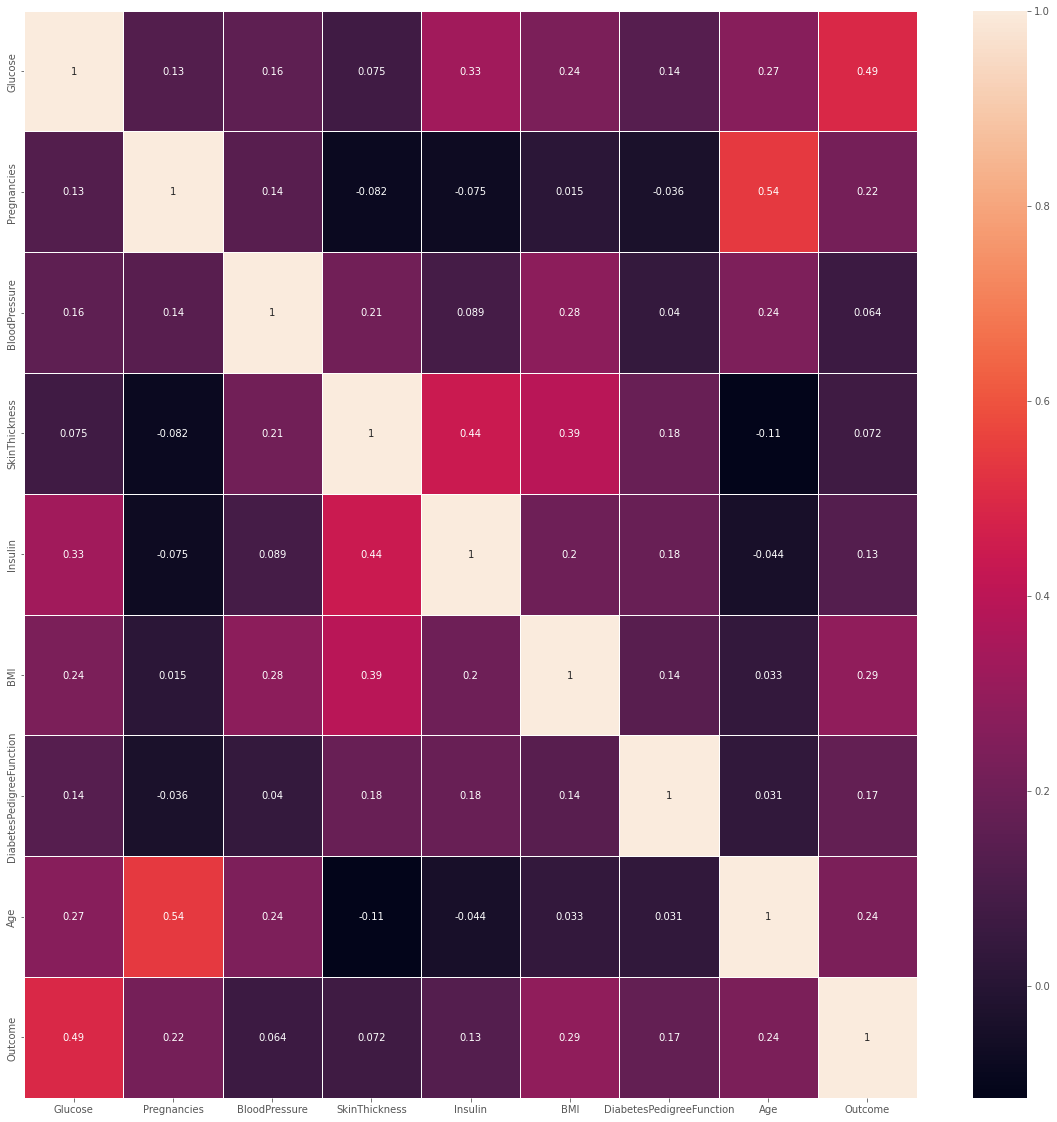

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop(['BloodPressure','SkinThickness','Outcome'],axis=1)

In [23]:
y=df['Outcome']

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.18,random_state=0)

In [25]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=1000)),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)),
    'gnb':make_pipeline(StandardScaler(), GaussianNB()),
    'dtc':make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)),
    'svc':make_pipeline(StandardScaler(),SVC(kernel='rbf')),
    'etc':make_pipeline(StandardScaler(),ExtraTreesClassifier(n_estimators=100, random_state=0)),
    'xg':make_pipeline(StandardScaler(),XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10))
}

In [27]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

[06:50:17] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
from sklearn.metrics import accuracy_score

al=[]
ac=[]
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    al.append(algo)
    ac.append(accuracy_score(y_test, yhat))
    print(algo, accuracy_score(y_test, yhat))

lr 0.7753623188405797
rc 0.782608695652174
rf 0.7536231884057971
gb 0.7463768115942029
gnb 0.7463768115942029
dtc 0.7608695652173914
svc 0.8043478260869565
etc 0.8188405797101449
xg 0.7681159420289855


In [29]:
for i in range(0,len(ac)):
  ac[i]=round(ac[i]*100,2)
ac

[77.54, 78.26, 75.36, 74.64, 74.64, 76.09, 80.43, 81.88, 76.81]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


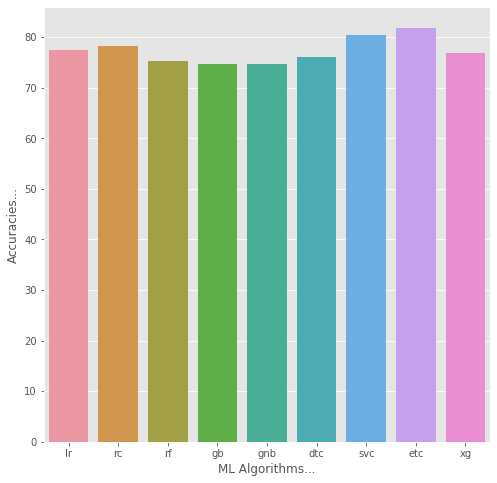

In [30]:

%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('ML Algorithms...')
plt.ylabel('Accuracies...')
ax=sns.barplot(al,ac)
#ax.bar_label(ax.containers[0])
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score


In [32]:
score_lr=cross_val_score(pipelines['gb'], X, y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.75686275 0.7480315  0.77952756]
Avg : 0.7614739334053832


In [33]:
for i in pipelines:
    print(pipelines[i][1])
    score_lr=cross_val_score(pipelines[i], X, y,cv=9)
    #print(score_lr)
    print("Avg :",np.average(score_lr))

LogisticRegression()
Avg : 0.7654528478057889
RidgeClassifier()
Avg : 0.7628384687208216
RandomForestClassifier(n_estimators=1000)
Avg : 0.769327731092437
GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)
Avg : 0.7549486461251167
GaussianNB()
Avg : 0.7536881419234361
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)
Avg : 0.7169623404917522
SVC()
Avg : 0.7746187363834423
ExtraTreesClassifier(random_state=0)
Avg : 0.7720043572984749
XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              mis

**IF YOU LIKE THIS NOTEBOOK... PLEASE DO UPVOTE**